<a href="https://colab.research.google.com/github/gitarshmah/Boolean_Gang/blob/main/All_Symbols_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36085 sha256=f46ca1e498cd9d5a7c23db187b52bc78b4a5977125aea64d9f910cab975534fb
  Stored in directory: /root/.cache/pip/wheels/b9/2c/cb/d74199e422a1dbc20297d10cfff9c54d03e0b5c6694d49ccdd
Successfully built nsepy


In [72]:
import nsepy as nse
import datetime
from datetime import date as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly as py
%matplotlib inline

In [ ]:
# comp_symbol = 'INFY'

In [143]:
comp_symbol = input("Company Symbol: ")

Company Symbol: 3MINDIA


## Load Dataset

In [144]:
today = dt.today()
two_yrs = today - datetime.timedelta(days = int(2.5*365))

In [145]:
#Load dataset
stock = nse.get_history(symbol=comp_symbol, index = False, start=two_yrs, end=today)

In [146]:
stock

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-08-13,3MINDIA,EQ,21376.05,21699.95,22000.00,21521.0,21950.00,21888.55,21870.42,4930,1.078212e+13,2666,2072,0.4203
2020-08-14,3MINDIA,EQ,21888.55,21000.00,21299.95,20800.0,20880.00,20903.65,20991.53,8567,1.798344e+13,3793,3779,0.4411
2020-08-17,3MINDIA,EQ,20903.65,20903.70,20998.35,20750.0,20872.00,20929.20,20844.69,1867,3.891703e+12,1056,851,0.4558
2020-08-18,3MINDIA,EQ,20929.20,20941.00,21089.95,20700.0,20710.00,20782.30,20918.40,2092,4.376129e+12,1074,926,0.4426
2020-08-19,3MINDIA,EQ,20782.30,20657.00,20949.50,20657.0,20840.00,20834.35,20826.47,1431,2.980268e+12,823,658,0.4598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,3MINDIA,EQ,23033.45,23100.00,23189.15,22500.0,22596.00,22612.40,22847.97,1316,3.006792e+12,670,637,0.4840
2023-02-07,3MINDIA,EQ,22612.40,22677.95,23198.00,22641.2,22975.60,22900.05,22954.93,1490,3.420285e+12,875,571,0.3832
2023-02-08,3MINDIA,EQ,22900.05,22900.05,23500.00,22750.4,22950.00,23117.80,23175.22,19538,4.527975e+13,4359,6206,0.3176


In [147]:
df = stock

## Analysis

In [148]:
stock['MA60'] = df['Close'].rolling(window=45, min_periods=0).mean()
stock['MA45'] = df['Close'].rolling(window=15, min_periods=0).mean()
stock['MA90'] = df['Close'].rolling(window=90, min_periods=0).mean()

In [149]:
fig = make_subplots(rows=2, cols = 1, shared_xaxes=True, subplot_titles=[comp_symbol, 'Volume'], vertical_spacing=0.10, row_heights=[0.7, 0.3]) #vertical_spacing, row_width

fig.add_trace(go.Candlestick(x=df.index, open=stock['Open'], close=stock['Close'], high=stock['High'], low=stock['Low'], name=comp_symbol) , row=1, col=1 )

fig.add_trace(go.Scatter(x=df.index, y=stock['MA90'], marker_color='lightgrey', name='MA90'), row=1, col=1)

# fig.add_trace(go.Scatter(x=df.index, y=stock['MA45'], marker_color='grey', name='MA45'), row=1, col=1)

fig.add_trace(go.Bar(x=df.index, y=stock['Volume'], marker_color='red', showlegend=False), row=2, col=1)

fig.update_layout(
    title= comp_symbol + ' historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price (Rs/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=False,
    width=1300,
    height=500,
    margin=dict(l=50, r=50, b=50, t=100, pad=3),
    paper_bgcolor='LightSteelBlue'
)
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show(renderer='colab')

## Data Preprocessing

In [150]:
pred_days = 45
timestep = 90

In [151]:
vol_df = df[['Volume']]
df = df[['Close']]

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))

# df_train = df

# def data_preprocess(df, pred_days, scaler):
# Test = 45 days
df_test = df[-pred_days:]
df_train = df[:-pred_days]
df_test.shape, df_train.shape

# Train-Val split (70-30)
trainSize = int(len(df_train) * 0.8)
df_val = df_train[trainSize:]
df_train = df_train[:trainSize]

# Create Train-Val 
train_set = df_train.values
val_set = df_val.values

train_set = scaler.fit_transform(np.array(train_set).reshape(-1,1))
val_set = scaler.fit_transform(np.array(val_set).reshape(-1,1))

def data_prep(dataset, timestep):
  X, y = [], []
  for i in range(timestep, dataset.shape[0]):
    X.append(dataset[i-timestep:i, 0])
    y.append(dataset[i,0])
  
  return (np.array(X), np.array(y))


(x_train, y_train) = data_prep(train_set, timestep)
(x_val, y_val) = data_prep(val_set, timestep)

x_train = np.reshape(x_train, newshape = (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, newshape = (x_val.shape[0], x_val.shape[1], 1))

    # return (x_train, y_train), (x_val, y_val), scaler, df_test

In [153]:
# (x_train, y_train), (x_val, y_val), scaler_close, df_test = data_preprocess(df, pred_days, scaler)
# (x_train_vol, y_train_vol), (x_val_vol, y_val_vol), scaler_vol, df_test_vol = data_preprocess(vol_df, pred_days, scaler)

## Define the model

In [218]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import Huber

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))

opt = Adam(learning_rate = 0.00015)
huber = Huber()
model.compile(optimizer = opt, loss=huber)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 90, 50)            10400     
                                                                 
 dropout_27 (Dropout)        (None, 90, 50)            0         
                                                                 
 lstm_28 (LSTM)              (None, 90, 50)            20200     
                                                                 
 dropout_28 (Dropout)        (None, 90, 50)            0         
                                                                 
 lstm_29 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_29 (Dropout)        (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

## Train the model

In [219]:
# Train the model
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, start_from_epoch=50)
hist = model.fit(x_train, y_train, batch_size=32, epochs=150, verbose=2, validation_data=(x_val, y_val), callbacks=[early_stop]) 

Epoch 1/150
12/12 - 10s - loss: 0.1253 - val_loss: 0.1668 - 10s/epoch - 874ms/step
Epoch 2/150
12/12 - 2s - loss: 0.0737 - val_loss: 0.0854 - 2s/epoch - 162ms/step
Epoch 3/150
12/12 - 2s - loss: 0.0314 - val_loss: 0.0150 - 2s/epoch - 165ms/step
Epoch 4/150
12/12 - 3s - loss: 0.0114 - val_loss: 0.0057 - 3s/epoch - 249ms/step
Epoch 5/150
12/12 - 2s - loss: 0.0122 - val_loss: 0.0072 - 2s/epoch - 158ms/step
Epoch 6/150
12/12 - 2s - loss: 0.0113 - val_loss: 0.0086 - 2s/epoch - 159ms/step
Epoch 7/150
12/12 - 2s - loss: 0.0109 - val_loss: 0.0057 - 2s/epoch - 166ms/step
Epoch 8/150
12/12 - 2s - loss: 0.0102 - val_loss: 0.0063 - 2s/epoch - 157ms/step
Epoch 9/150
12/12 - 2s - loss: 0.0094 - val_loss: 0.0062 - 2s/epoch - 170ms/step
Epoch 10/150
12/12 - 3s - loss: 0.0092 - val_loss: 0.0074 - 3s/epoch - 246ms/step
Epoch 11/150
12/12 - 2s - loss: 0.0092 - val_loss: 0.0059 - 2s/epoch - 163ms/step
Epoch 12/150
12/12 - 2s - loss: 0.0090 - val_loss: 0.0057 - 2s/epoch - 164ms/step
Epoch 13/150
12/12 - 2s

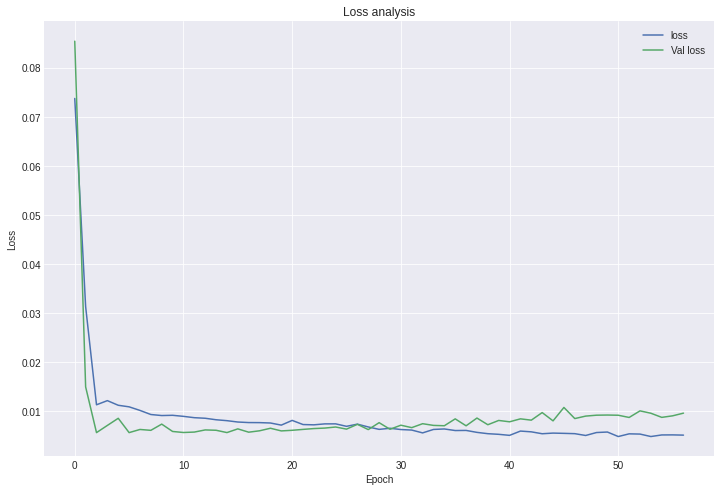

In [220]:
plt.figure(figsize = (12, 8))
plt.plot(hist.history['loss'][1:], label = "loss")
plt.plot(hist.history['val_loss'][1:], label = "Val loss")
plt.title("Loss analysis")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid("both")

## Model Evaluation

In [221]:
train_pred = model.predict(x_train)
val_pred = model.predict(x_val)

train_pred = scaler.inverse_transform(train_pred)
val_pred = scaler.inverse_transform(val_pred)

train_set_temp = scaler.inverse_transform(train_set)
val_set_temp = scaler.inverse_transform(val_set)

1/1 [==============================] - 0s 65ms/step


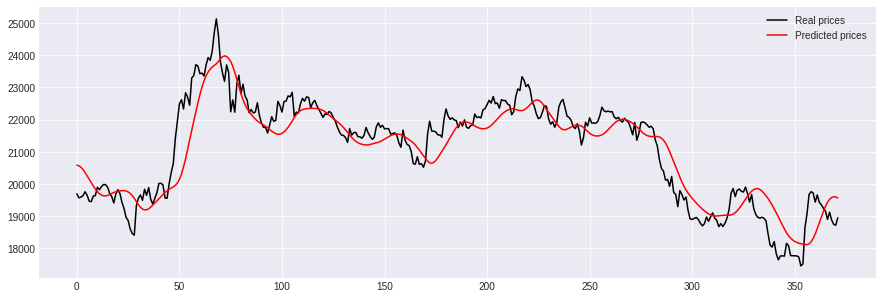

In [222]:
x1 = train_set_temp[-(train_pred.shape[0]):]
plt.figure(figsize = (15,5))
plt.plot(x1, color = 'black', label = 'Real prices')
plt.plot(train_pred, color='red', label='Predicted prices')
plt.legend()
plt.grid()

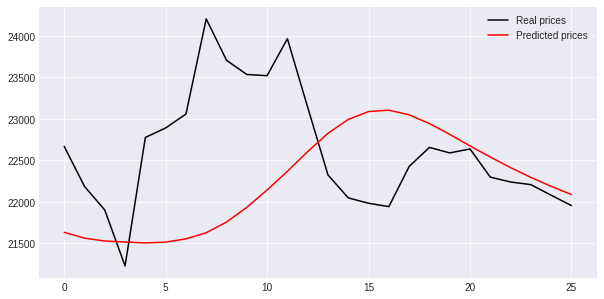

In [223]:
x2 = val_set_temp[-(val_pred.shape[0]):]
plt.figure(figsize = (10,5))
plt.plot(x2, color = 'black', label = 'Real prices')
plt.plot(val_pred, color='red', label='Predicted prices')
plt.legend()
plt.grid()

## Prediction

In [224]:
train_dataset = pd.concat([df_train, df_val])

train_values = train_dataset.values

In [225]:
def prediction(timestep, inp):
  input = inp[-(timestep+pred_days):]

  input = scaler.fit_transform(np.array(input).reshape(-1,1))

  x_test = []
  for i in range(timestep, input.shape[0]):
    x_test.append(input[(i - timestep) : i , 0])
  x_test = np.array(x_test)

  x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

  return x_test, scaler

In [226]:
x_test, scaler = prediction(timestep, train_values)
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

2/2 [==============================] - 0s 31ms/step


In [227]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
accuracy = (1 - MAPE(df_test.values, y_pred))*100 

Accurarcy = 97.4516974446884


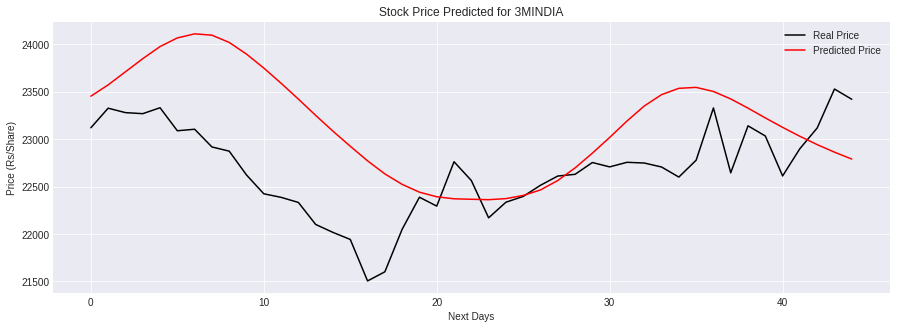

In [228]:
plt.figure(figsize=(15,5))

plt.plot(df_test.values, color='black', label='Real Price')
plt.plot(y_pred, color='red', label='Predicted Price')
plt.grid()
plt.legend()
plt.title(f"Stock Price Predicted for {comp_symbol}")
plt.xlabel("Next Days")
plt.ylabel("Price (Rs/Share)")

plt.style.use('seaborn-dark')
print("Accurarcy = " + str(accuracy))